# 1. Importing Libraries and dataset

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset, #Set ID as Index Column
df= pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
df.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

In [3]:
df1= df.drop(columns='ID#',axis=1)

In [4]:
# Column rename.
df1.rename(columns={'Award?':'Award'},inplace=True)

In [5]:
df1.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [7]:
df1.describe()

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000      0.00000           0.000000         0.000000   
25%      1250.000000      3.00000           0.000000         0.000000   
50%      7171.000000     12.00000           0.000000         0.000000   
75%     23800.500000     17.00000         311.000000         1.000000   
max    263685.000000     86.00000       30817.000000        53.000000   

       Days_since_enroll        Award  
count         3999.00000  3999.000000  
mean          4118.55939     0.370343  
std           2065.13454     0.482957  
min              2.00000     0.000000  
25%           2330.00000     0.000000  
50%           4096.00000     0.000000  
75%           5790.50000     1.000000  
max           8296.00000     1.000000

In [8]:
#checking Missing Values
df1.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [9]:
#checking Duplicate Values
df1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3997    False
3998    False
Length: 3999, dtype: bool

In [10]:
df1[ df1.duplicated() ]

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
3876     1000           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
3876            0                  0                0               1597   

      Award  
3876      0

In [11]:
df1.drop_duplicates(inplace=True)

## Exploratory Data Analysis

<AxesSubplot:xlabel='Award', ylabel='count'>

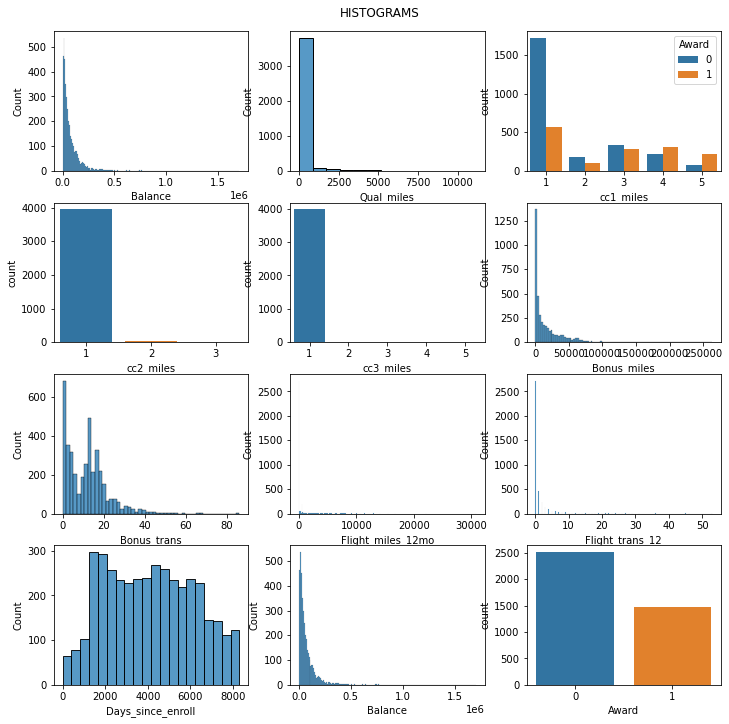

In [12]:
# Creating histograms for all the features
fig,axs = plt.subplots(4,3,figsize = (10,10))
plt.suptitle('HISTOGRAMS')
plt.tight_layout()
sns.histplot(x='Balance',data=df1,ax=axs[0,0],)
sns.histplot(x='Qual_miles',data=df1,ax=axs[0,1])
sns.countplot(x='cc1_miles', data=df1,hue='Award', ax=axs[0,2])
sns.countplot(x='cc2_miles',data=df1,ax=axs[1,0])
sns.countplot(x='cc3_miles',data=df1,ax=axs[1,1])
sns.histplot(x='Bonus_miles',data=df1,ax=axs[1,2])
sns.histplot(x='Bonus_trans',data=df1,ax=axs[2,0])
sns.histplot(x='Flight_miles_12mo',data=df1,ax=axs[2,1])
sns.histplot(x='Flight_trans_12',data=df1,ax=axs[2,2])
sns.histplot(x='Days_since_enroll',data=df1,ax=axs[3,0])
sns.histplot(x='Balance',data=df1,ax=axs[3,1])
sns.countplot(x='Award',data=df1,ax=axs[3,2])

<AxesSubplot:>

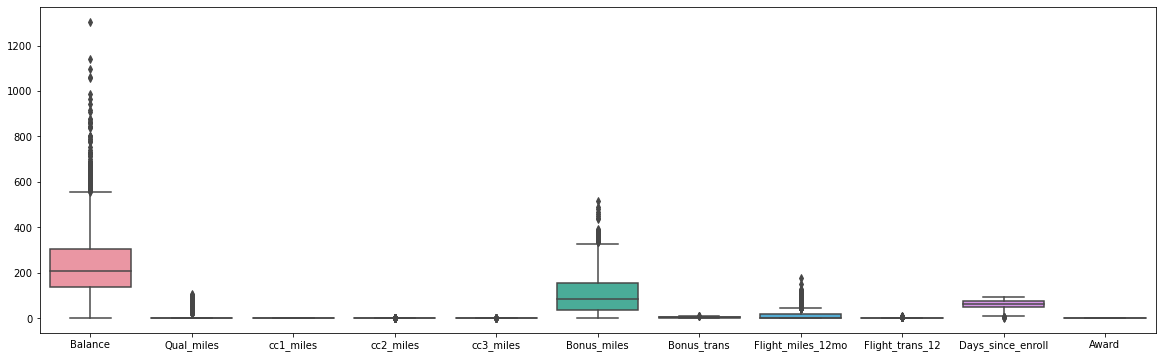

In [13]:
# boxplot before treating outliers
plt.figure(figsize=(20,6))
sns.boxplot(data=np.sqrt(df1))


<AxesSubplot:xlabel='Award', ylabel='Balance'>

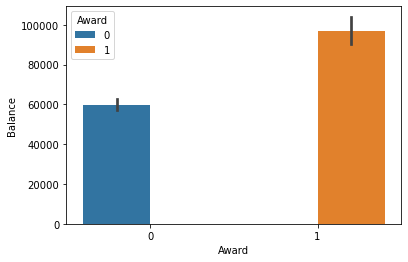

In [14]:
sns.barplot(data=df1,x='Award',y='Balance',hue='Award')

<AxesSubplot:xlabel='Days_since_enroll', ylabel='Balance'>

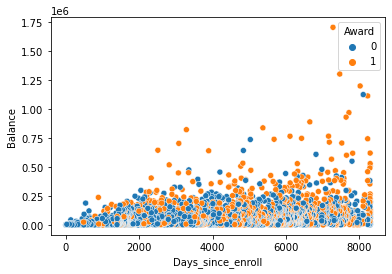

In [15]:
sns.scatterplot(data=df1, x='Days_since_enroll', y='Balance', hue='Award')

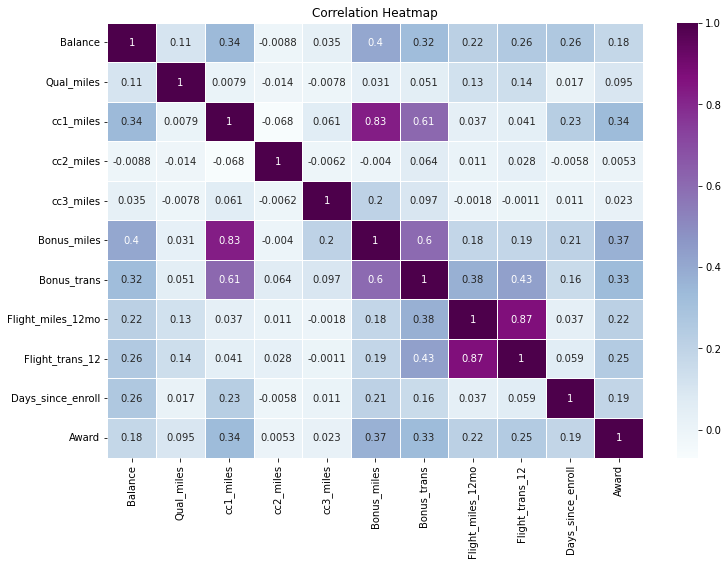

In [16]:
# Generate a correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), cmap='BuPu', annot=True,linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Unique points in this correlation matrix:

cc1_miles is positively correlated with Bonus_miles.

flight_trans_12 is positively correlated with flight_miles_12mo.

bonus_trans is positively correlated with cc1_miles.

flight_miles_12mo is positively correlated with flight_trans_12

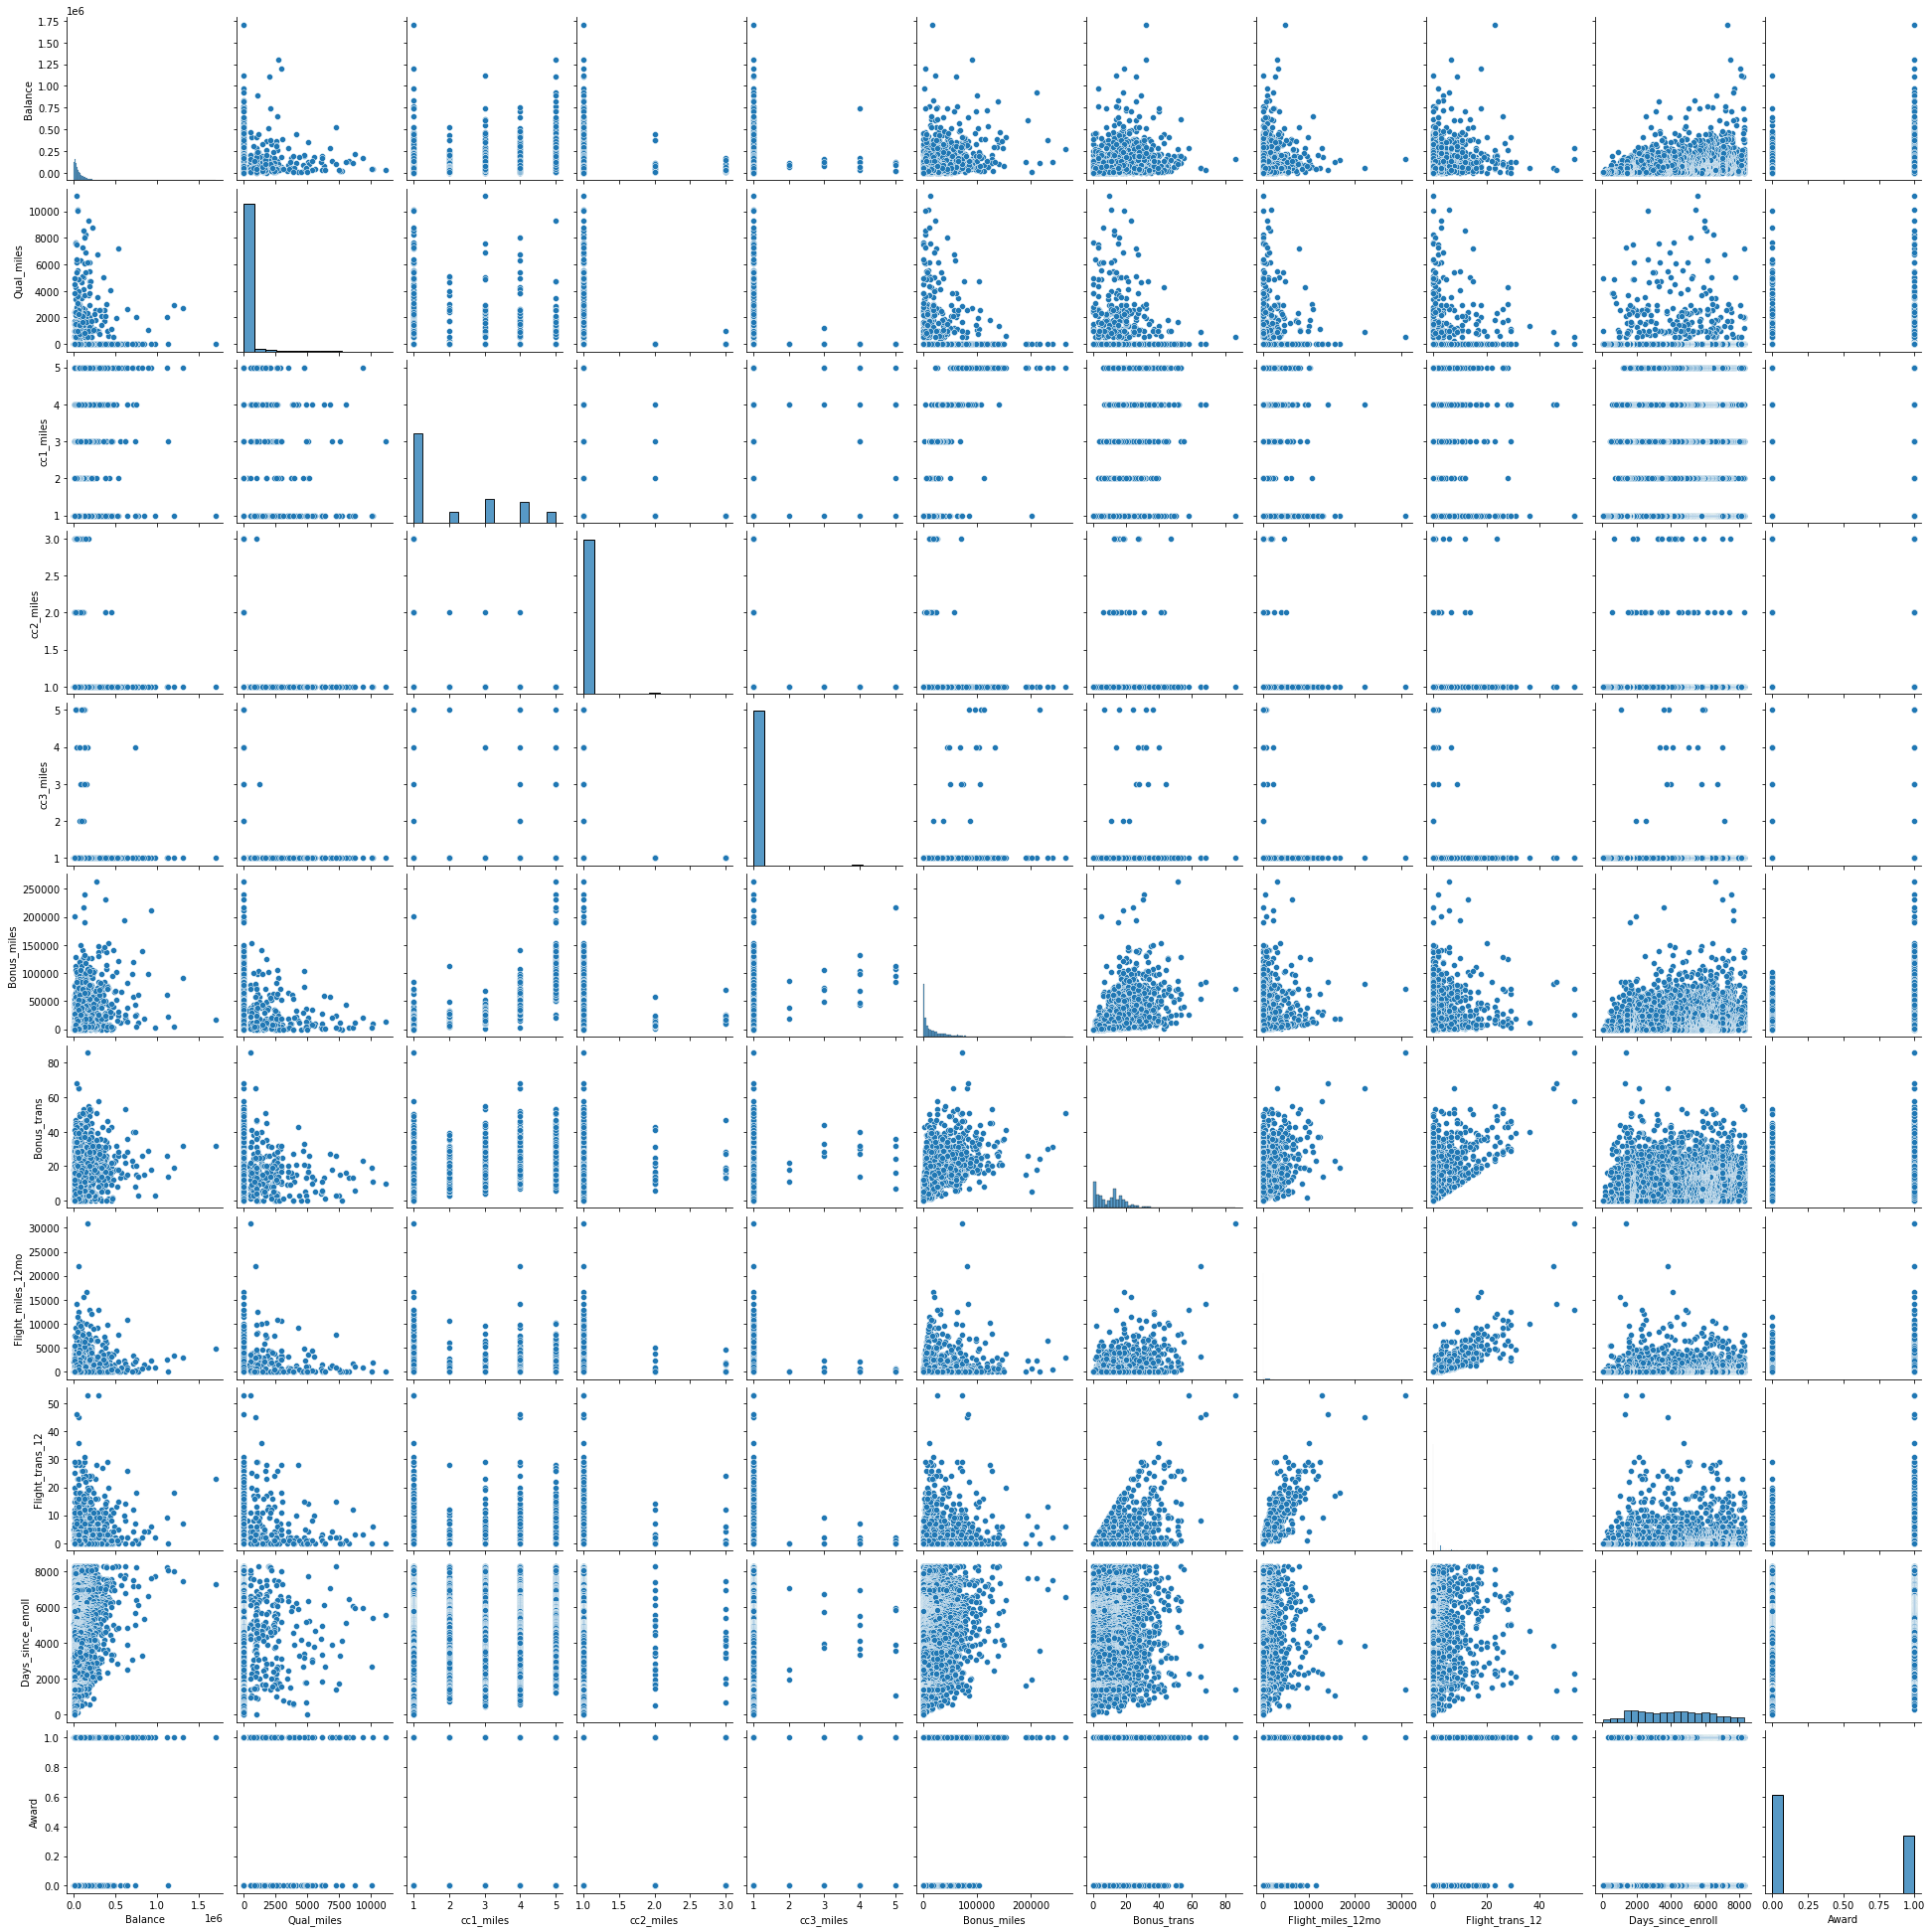

In [17]:
sns.pairplot(df1)

In [18]:
df1.shape

(3998, 11)

In [19]:
# Dropping Award? Column as 
df1 = df.drop(columns=['ID#','Award?'],axis=1)

In [20]:
df1.shape

(3999, 10)

# Data Preprocessing

### Standardizing the Data

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
std_data= StandardScaler()
std_data = std_data.fit_transform(df1)

In [23]:
std_data.shape

(3999, 10)

In [24]:
df1.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll'],
      dtype='object')

In [25]:
std_data_df = pd.DataFrame(std_data,columns=df1.columns)
std_data_df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    -0.451141   -0.186299  -0.769578  -0.098242  -0.062767    -0.702786   
1    -0.539457   -0.186299  -0.769578  -0.098242  -0.062767    -0.701088   
2    -0.320031   -0.186299  -0.769578  -0.098242  -0.062767    -0.539253   
3    -0.583799   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
4     0.239678   -0.186299   1.409471  -0.098242  -0.062767     1.083121   
...        ...         ...        ...        ...        ...          ...   
3994 -0.547079   -0.186299  -0.769578  -0.098242  -0.062767    -0.356960   
3995 -0.091465   -0.186299  -0.769578  -0.098242  -0.062767    -0.669367   
3996 -0.000043   -0.186299   0.683121  -0.098242  -0.062767     0.343804   
3997 -0.185607   -0.186299  -0.769578  -0.098242  -0.062767    -0.689286   
3998 -0.700508   -0.186299  -0.769578  -0.098242  -0.062767    -0.709992   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
0       -1.104065          -0.328603        -0.362168           1.395454  
1       -0.999926          -0.328603        -0.362168           1.379957  
2       -0.791649          -0.328603        -0.362168           1.411920  
3       -1.104065          -0.328603        -0.362168           1.372208  
4        1.499394           1.154932         0.692490           1.363975  
...           ...                ...              ...                ...  
3994    -0.791649          -0.185750        -0.098503          -1.315120  
3995    -0.687511          -0.328603        -0.362168          -1.318994  
3996    -0.375096          -0.328603        -0.362168          -1.315604  
3997    -1.104065           0.028531        -0.098503          -1.316088  
3998    -1.208203          -0.328603        -0.362168          -1.317541  

[3999 rows x 10 columns]

# Create the model with Hierarchical Clustering Algorithm

In [26]:
import scipy.cluster.hierarchy as hier_cluster
from sklearn.cluster import AgglomerativeClustering

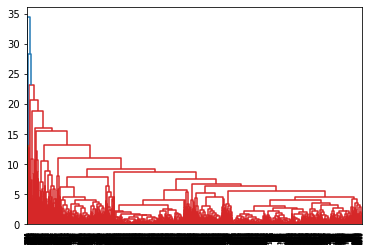

In [27]:
dendogram = hier_cluster.dendrogram(hier_cluster.linkage(std_data_df,method='complete'))

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df1)

In [29]:
scaled_data_df = pd.DataFrame(scaled_data,columns=df1.columns)
scaled_data_df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.016508         0.0       0.00        0.0        0.0     0.000660   
1     0.011288         0.0       0.00        0.0        0.0     0.000815   
2     0.024257         0.0       0.00        0.0        0.0     0.015636   
3     0.008667         0.0       0.00        0.0        0.0     0.001896   
4     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
3994  0.010837         0.0       0.00        0.0        0.0     0.032330   
3995  0.037766         0.0       0.00        0.0        0.0     0.003720   
3996  0.043169         0.0       0.50        0.0        0.0     0.096505   
3997  0.032202         0.0       0.00        0.0        0.0     0.001896   
3998  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
0        0.011628           0.000000         0.000000           0.843742  
1        0.023256           0.000000         0.000000           0.839884  
2        0.046512           0.000000         0.000000           0.847842  
3        0.011628           0.000000         0.000000           0.837955  
4        0.302326           0.067398         0.075472           0.835905  
...           ...                ...              ...                ...  
3994     0.046512           0.006490         0.018868           0.168917  
3995     0.058140           0.000000         0.000000           0.167953  
3996     0.093023           0.000000         0.000000           0.168797  
3997     0.011628           0.016225         0.018868           0.168676  
3998     0.000000           0.000000         0.000000           0.168314  

[3999 rows x 10 columns]

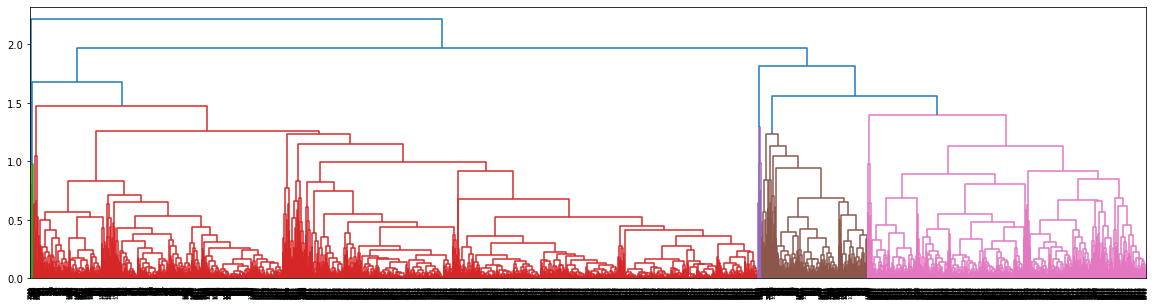

In [30]:
plt.figure(figsize=(20,5))
dendogram2 = hier_cluster.dendrogram(hier_cluster.linkage(scaled_data_df,method='complete'))

In [31]:
agg_cluster = AgglomerativeClustering(n_clusters=5,linkage='complete')

In [32]:
hc_final = agg_cluster.fit_predict(scaled_data_df)
clusters = pd.DataFrame(hc_final,columns=['Clusters'])

In [33]:
clusters.value_counts()

Clusters
2           2596
0           1376
1             14
4              9
3              4
dtype: int64

In [34]:
clusters.shape

(3999, 1)

In [35]:
clusters

Clusters
0            2
1            2
2            2
3            2
4            0
...        ...
3994         2
3995         2
3996         0
3997         2
3998         2

[3999 rows x 1 columns]

In [36]:
scaled_data_df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.016508         0.0       0.00        0.0        0.0     0.000660   
1     0.011288         0.0       0.00        0.0        0.0     0.000815   
2     0.024257         0.0       0.00        0.0        0.0     0.015636   
3     0.008667         0.0       0.00        0.0        0.0     0.001896   
4     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
3994  0.010837         0.0       0.00        0.0        0.0     0.032330   
3995  0.037766         0.0       0.00        0.0        0.0     0.003720   
3996  0.043169         0.0       0.50        0.0        0.0     0.096505   
3997  0.032202         0.0       0.00        0.0        0.0     0.001896   
3998  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
0        0.011628           0.000000         0.000000           0.843742  
1        0.023256           0.000000         0.000000           0.839884  
2        0.046512           0.000000         0.000000           0.847842  
3        0.011628           0.000000         0.000000           0.837955  
4        0.302326           0.067398         0.075472           0.835905  
...           ...                ...              ...                ...  
3994     0.046512           0.006490         0.018868           0.168917  
3995     0.058140           0.000000         0.000000           0.167953  
3996     0.093023           0.000000         0.000000           0.168797  
3997     0.011628           0.016225         0.018868           0.168676  
3998     0.000000           0.000000         0.000000           0.168314  

[3999 rows x 10 columns]

In [37]:
h_clustered_df = pd.concat([scaled_data_df,clusters],axis=1)

In [38]:
h_clustered_df

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.016508         0.0       0.00        0.0        0.0     0.000660   
1     0.011288         0.0       0.00        0.0        0.0     0.000815   
2     0.024257         0.0       0.00        0.0        0.0     0.015636   
3     0.008667         0.0       0.00        0.0        0.0     0.001896   
4     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
3994  0.010837         0.0       0.00        0.0        0.0     0.032330   
3995  0.037766         0.0       0.00        0.0        0.0     0.003720   
3996  0.043169         0.0       0.50        0.0        0.0     0.096505   
3997  0.032202         0.0       0.00        0.0        0.0     0.001896   
3998  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0        0.011628           0.000000         0.000000           0.843742   
1        0.023256           0.000000         0.000000           0.839884   
2        0.046512           0.000000         0.000000           0.847842   
3        0.011628           0.000000         0.000000           0.837955   
4        0.302326           0.067398         0.075472           0.835905   
...           ...                ...              ...                ...   
3994     0.046512           0.006490         0.018868           0.168917   
3995     0.058140           0.000000         0.000000           0.167953   
3996     0.093023           0.000000         0.000000           0.168797   
3997     0.011628           0.016225         0.018868           0.168676   
3998     0.000000           0.000000         0.000000           0.168314   

      Clusters  
0            2  
1            2  
2            2  
3            2  
4            0  
...        ...  
3994         2  
3995         2  
3996         0  
3997         2  
3998         2  

[3999 rows x 11 columns]

In [39]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_data_df,clusters)

0.38435765125509896

# K- Means Clustering

In [40]:
scaled_data_df.head() 

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  0.016508         0.0       0.00        0.0        0.0     0.000660   
1  0.011288         0.0       0.00        0.0        0.0     0.000815   
2  0.024257         0.0       0.00        0.0        0.0     0.015636   
3  0.008667         0.0       0.00        0.0        0.0     0.001896   
4  0.057338         0.0       0.75        0.0        0.0     0.164211   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
0     0.011628           0.000000         0.000000           0.843742  
1     0.023256           0.000000         0.000000           0.839884  
2     0.046512           0.000000         0.000000           0.847842  
3     0.011628           0.000000         0.000000           0.837955  
4     0.302326           0.067398         0.075472           0.835905

In [41]:
df_kmeans = scaled_data_df.copy()

In [42]:
df_kmeans.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  0.016508         0.0       0.00        0.0        0.0     0.000660   
1  0.011288         0.0       0.00        0.0        0.0     0.000815   
2  0.024257         0.0       0.00        0.0        0.0     0.015636   
3  0.008667         0.0       0.00        0.0        0.0     0.001896   
4  0.057338         0.0       0.75        0.0        0.0     0.164211   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
0     0.011628           0.000000         0.000000           0.843742  
1     0.023256           0.000000         0.000000           0.839884  
2     0.046512           0.000000         0.000000           0.847842  
3     0.011628           0.000000         0.000000           0.837955  
4     0.302326           0.067398         0.075472           0.835905

In [43]:
from sklearn.cluster import KMeans

In [44]:
wcss = []
for i in range(1,11):
    model = KMeans(n_clusters=i).fit(df_kmeans)
    wcss.append(model.inertia_)
    
plt.plot(range(1,11),wcss)
plt.xticks(range(1, 11))
plt.ylabel('WCSS')
plt.xlabel('No. of clusters')
plt.title('ELBOW CURVE')

In [72]:
wcss

[898.2705822007468,
 448.99891944456994,
 331.4302699886141,
 272.39276621164277,
 241.07712716728577,
 217.76459337375076,
 200.21319142608434,
 182.72818934000512,
 172.1206962158683,
 164.43465427511202]

Text(0.5, 1.0, 'ELBOW CURVE')

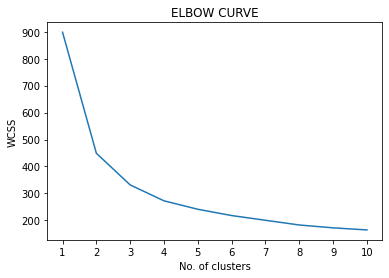

In [71]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1, 11))
plt.ylabel('WCSS')
plt.xlabel('No. of clusters')
plt.title('ELBOW CURVE')

In [45]:
model_kmeans = KMeans(n_clusters=3)
model_kmeans.fit(df_kmeans)

KMeans(n_clusters=3)

In [46]:
kmeans_clusters = model_kmeans.predict(df_kmeans)

In [47]:
model_kmeans.cluster_centers_

array([[0.06637993, 0.01287489, 0.69452297, 0.00070671, 0.00618375,
        0.15006833, 0.22046183, 0.01631145, 0.02814854, 0.56666695],
       [0.0236968 , 0.01096235, 0.02754237, 0.01094633, 0.00123588,
        0.01748617, 0.08390816, 0.01278401, 0.02177273, 0.26345878],
       [0.0386667 , 0.01537325, 0.03210616, 0.01070205, 0.00149829,
        0.01961353, 0.09308299, 0.01585339, 0.02823727, 0.69343452]])

In [48]:
model_kmeans.inertia_

331.43247345365694

In [49]:
km_cluster_df = pd.DataFrame(kmeans_clusters)
km_cluster_df

0
0     2
1     2
2     2
3     2
4     0
...  ..
3994  1
3995  1
3996  0
3997  1
3998  1

[3999 rows x 1 columns]

In [50]:
km_cluster_df.value_counts()

0    1415
1    1415
2    1169
dtype: int64

In [51]:
df_kmeans_w_clusters = df_kmeans.copy()
df_kmeans_w_clusters['cluster_labels']=km_cluster_df

In [52]:
df_kmeans_w_clusters

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0     0.016508         0.0       0.00        0.0        0.0     0.000660   
1     0.011288         0.0       0.00        0.0        0.0     0.000815   
2     0.024257         0.0       0.00        0.0        0.0     0.015636   
3     0.008667         0.0       0.00        0.0        0.0     0.001896   
4     0.057338         0.0       0.75        0.0        0.0     0.164211   
...        ...         ...        ...        ...        ...          ...   
3994  0.010837         0.0       0.00        0.0        0.0     0.032330   
3995  0.037766         0.0       0.00        0.0        0.0     0.003720   
3996  0.043169         0.0       0.50        0.0        0.0     0.096505   
3997  0.032202         0.0       0.00        0.0        0.0     0.001896   
3998  0.001769         0.0       0.00        0.0        0.0     0.000000   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0        0.011628           0.000000         0.000000           0.843742   
1        0.023256           0.000000         0.000000           0.839884   
2        0.046512           0.000000         0.000000           0.847842   
3        0.011628           0.000000         0.000000           0.837955   
4        0.302326           0.067398         0.075472           0.835905   
...           ...                ...              ...                ...   
3994     0.046512           0.006490         0.018868           0.168917   
3995     0.058140           0.000000         0.000000           0.167953   
3996     0.093023           0.000000         0.000000           0.168797   
3997     0.011628           0.016225         0.018868           0.168676   
3998     0.000000           0.000000         0.000000           0.168314   

      cluster_labels  
0                  2  
1                  2  
2                  2  
3                  2  
4                  0  
...              ...  
3994               1  
3995               1  
3996               0  
3997               1  
3998               1  

[3999 rows x 11 columns]

# Vizualizing the KMeans Clusters.

<AxesSubplot:xlabel='Bonus_trans', ylabel='Days_since_enroll'>

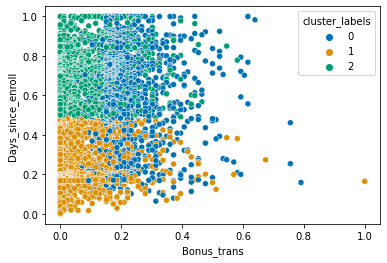

In [53]:
sns.scatterplot(x='Bonus_trans',y='Days_since_enroll',hue='cluster_labels',data=df_kmeans_w_clusters,palette='colorblind')

In [54]:
import sklearn
sklearn.metrics.silhouette_score(df_kmeans,df_kmeans_w_clusters['cluster_labels'])

0.40383644873633734

# DBSCAN Clustering

In [55]:
from sklearn.cluster import DBSCAN

In [56]:
db_df=scaled_data_df.copy()

In [57]:
db_df.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  0.016508         0.0       0.00        0.0        0.0     0.000660   
1  0.011288         0.0       0.00        0.0        0.0     0.000815   
2  0.024257         0.0       0.00        0.0        0.0     0.015636   
3  0.008667         0.0       0.00        0.0        0.0     0.001896   
4  0.057338         0.0       0.75        0.0        0.0     0.164211   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  
0     0.011628           0.000000         0.000000           0.843742  
1     0.023256           0.000000         0.000000           0.839884  
2     0.046512           0.000000         0.000000           0.847842  
3     0.011628           0.000000         0.000000           0.837955  
4     0.302326           0.067398         0.075472           0.835905

In [58]:
db_params = DBSCAN(eps=0.1,min_samples=10)
db_params.fit(db_df)

DBSCAN(eps=0.1, min_samples=10)

In [59]:
df_df_w_clstr_lbl = db_df.copy()

In [60]:
df_df_w_clstr_lbl['cluster_labels'] = db_params.labels_

In [61]:
df_df_w_clstr_lbl.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  0.016508         0.0       0.00        0.0        0.0     0.000660   
1  0.011288         0.0       0.00        0.0        0.0     0.000815   
2  0.024257         0.0       0.00        0.0        0.0     0.015636   
3  0.008667         0.0       0.00        0.0        0.0     0.001896   
4  0.057338         0.0       0.75        0.0        0.0     0.164211   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0     0.011628           0.000000         0.000000           0.843742   
1     0.023256           0.000000         0.000000           0.839884   
2     0.046512           0.000000         0.000000           0.847842   
3     0.011628           0.000000         0.000000           0.837955   
4     0.302326           0.067398         0.075472           0.835905   

   cluster_labels  
0               0  
1               0  
2               0  
3               0  
4               4

In [62]:
df_df_w_clstr_lbl['cluster_labels'].value_counts()

 0    2062
 1     544
-1     537
 4     438
 2     253
 3     165
Name: cluster_labels, dtype: int64

In [63]:
df_df_w_clstr_lbl.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0  0.016508         0.0       0.00        0.0        0.0     0.000660   
1  0.011288         0.0       0.00        0.0        0.0     0.000815   
2  0.024257         0.0       0.00        0.0        0.0     0.015636   
3  0.008667         0.0       0.00        0.0        0.0     0.001896   
4  0.057338         0.0       0.75        0.0        0.0     0.164211   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0     0.011628           0.000000         0.000000           0.843742   
1     0.023256           0.000000         0.000000           0.839884   
2     0.046512           0.000000         0.000000           0.847842   
3     0.011628           0.000000         0.000000           0.837955   
4     0.302326           0.067398         0.075472           0.835905   

   cluster_labels  
0               0  
1               0  
2               0  
3               0  
4               4

In [64]:
df_df_w_clstr_lbl['cluster_labels'].value_counts()

 0    2062
 1     544
-1     537
 4     438
 2     253
 3     165
Name: cluster_labels, dtype: int64

<AxesSubplot:xlabel='Balance', ylabel='Bonus_miles'>

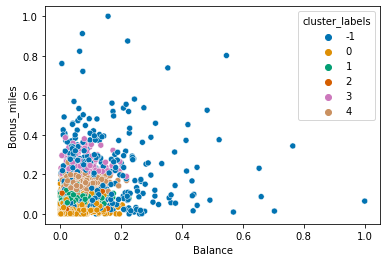

In [65]:
sns.scatterplot(data=df_df_w_clstr_lbl,x='Balance',y='Bonus_miles',hue='cluster_labels',palette='colorblind')

In [66]:
import sklearn
sklearn.metrics.silhouette_score(db_df,db_params.labels_)

0.17629611270820705

## Pairplot Hierarchical Clusters

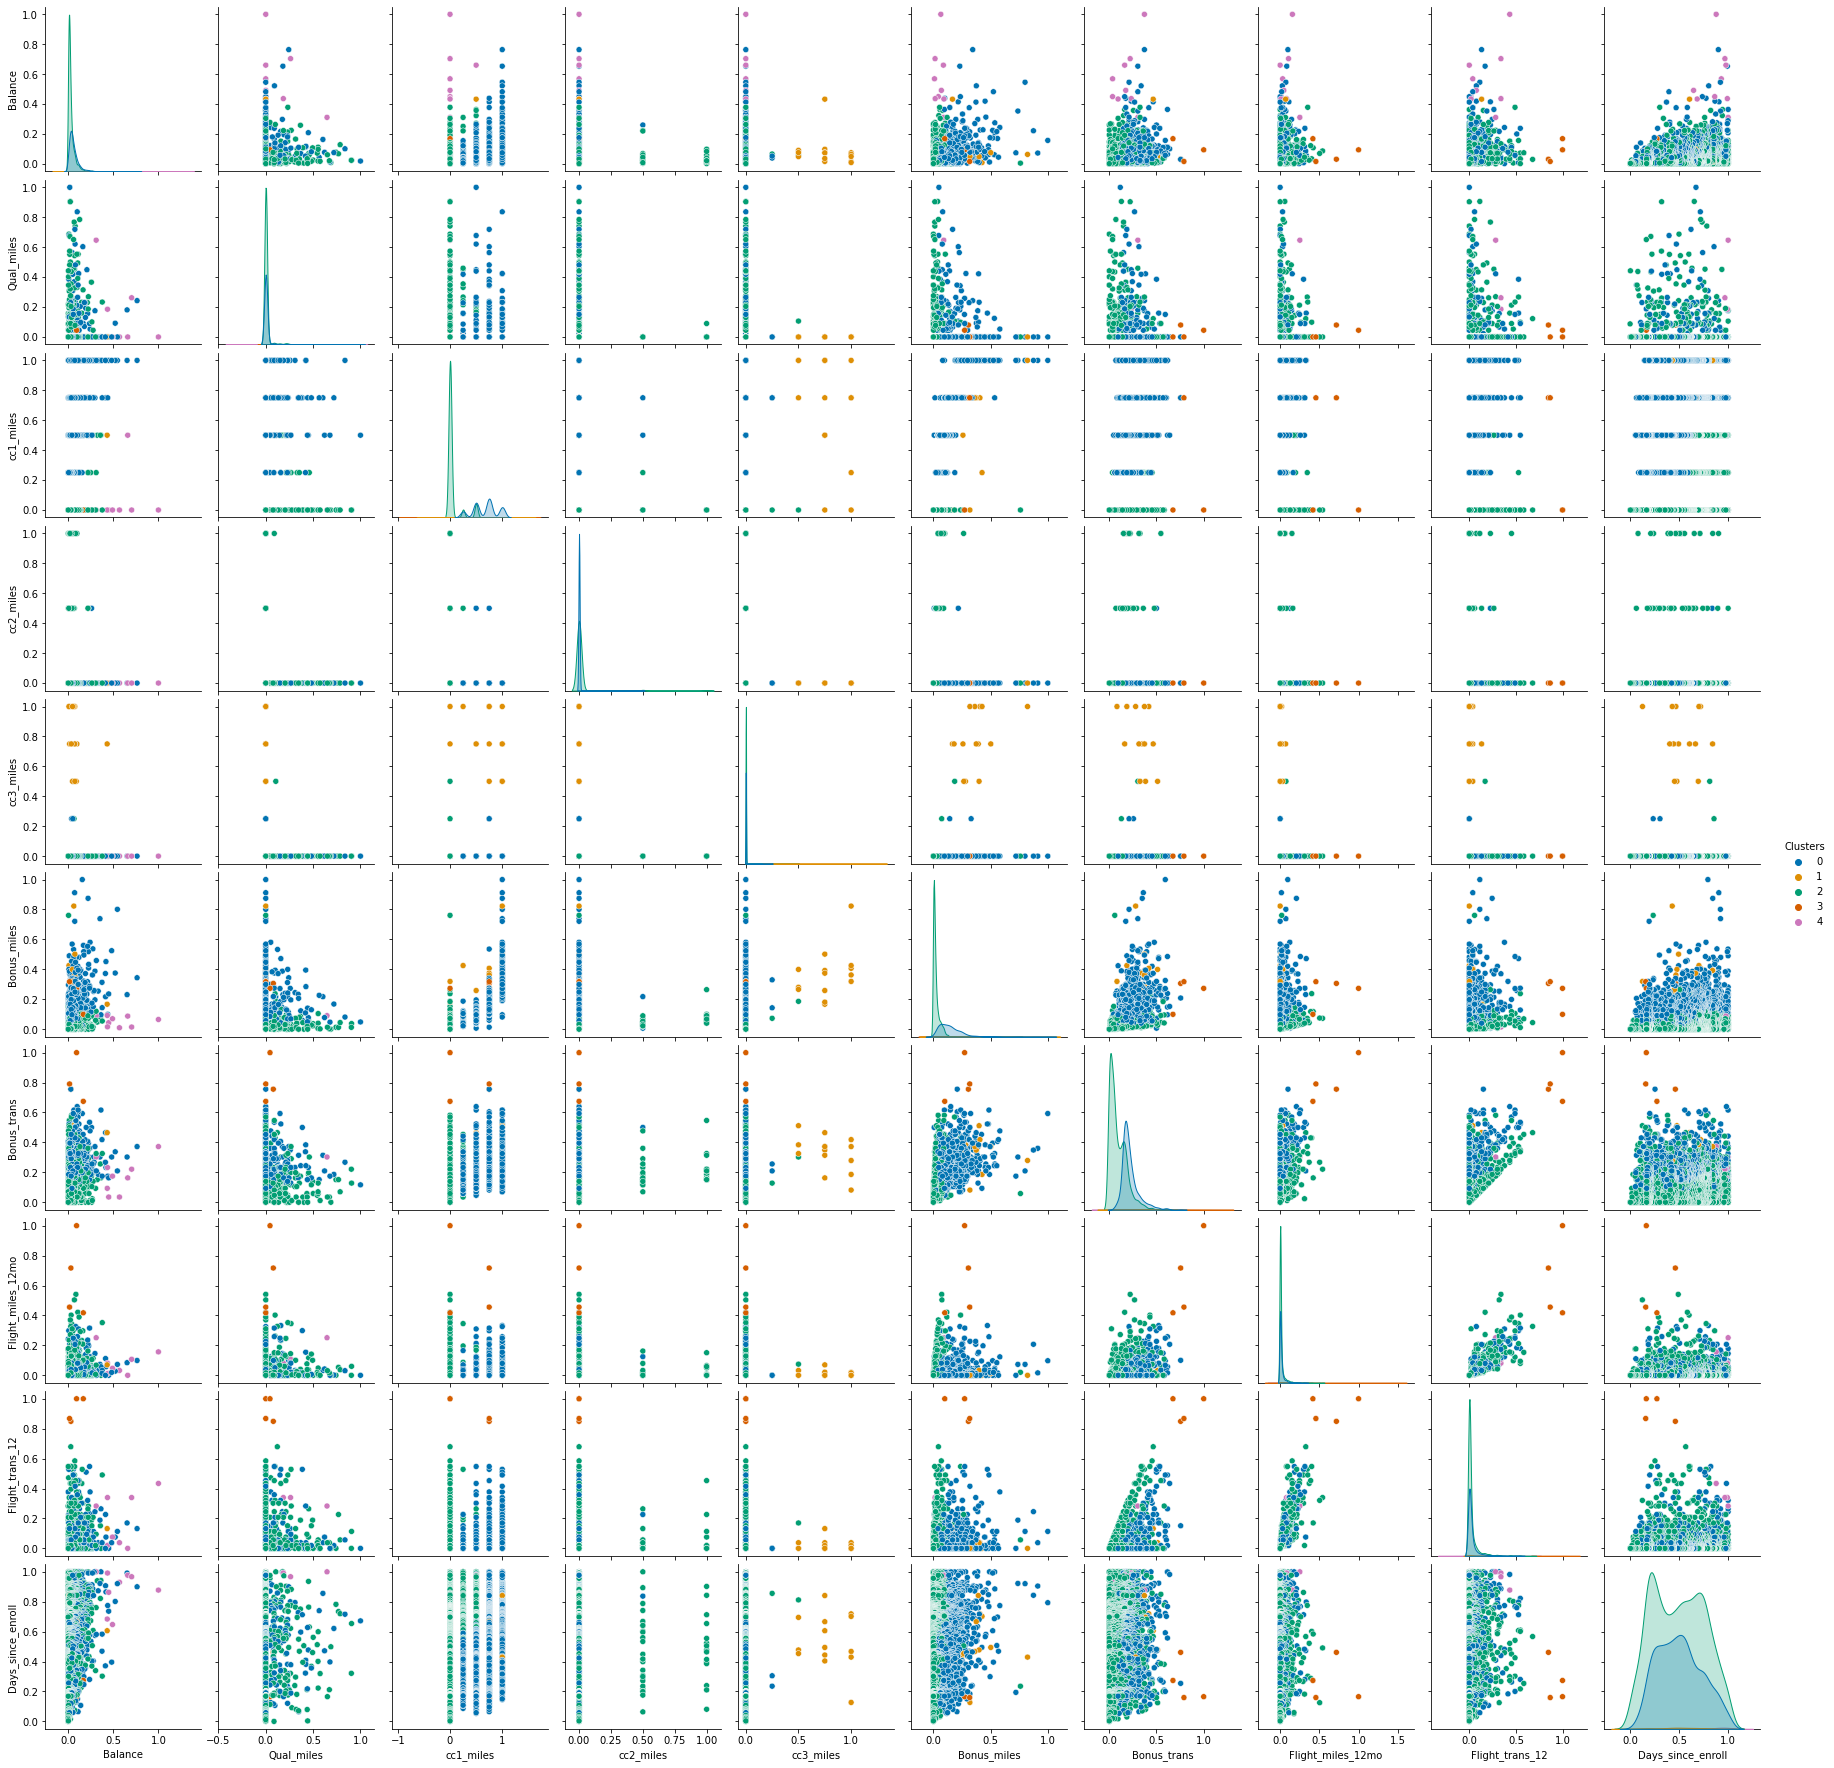

In [67]:
sns.pairplot(h_clustered_df,hue='Clusters',palette='colorblind')

## Pairplot Kmeans Clusters

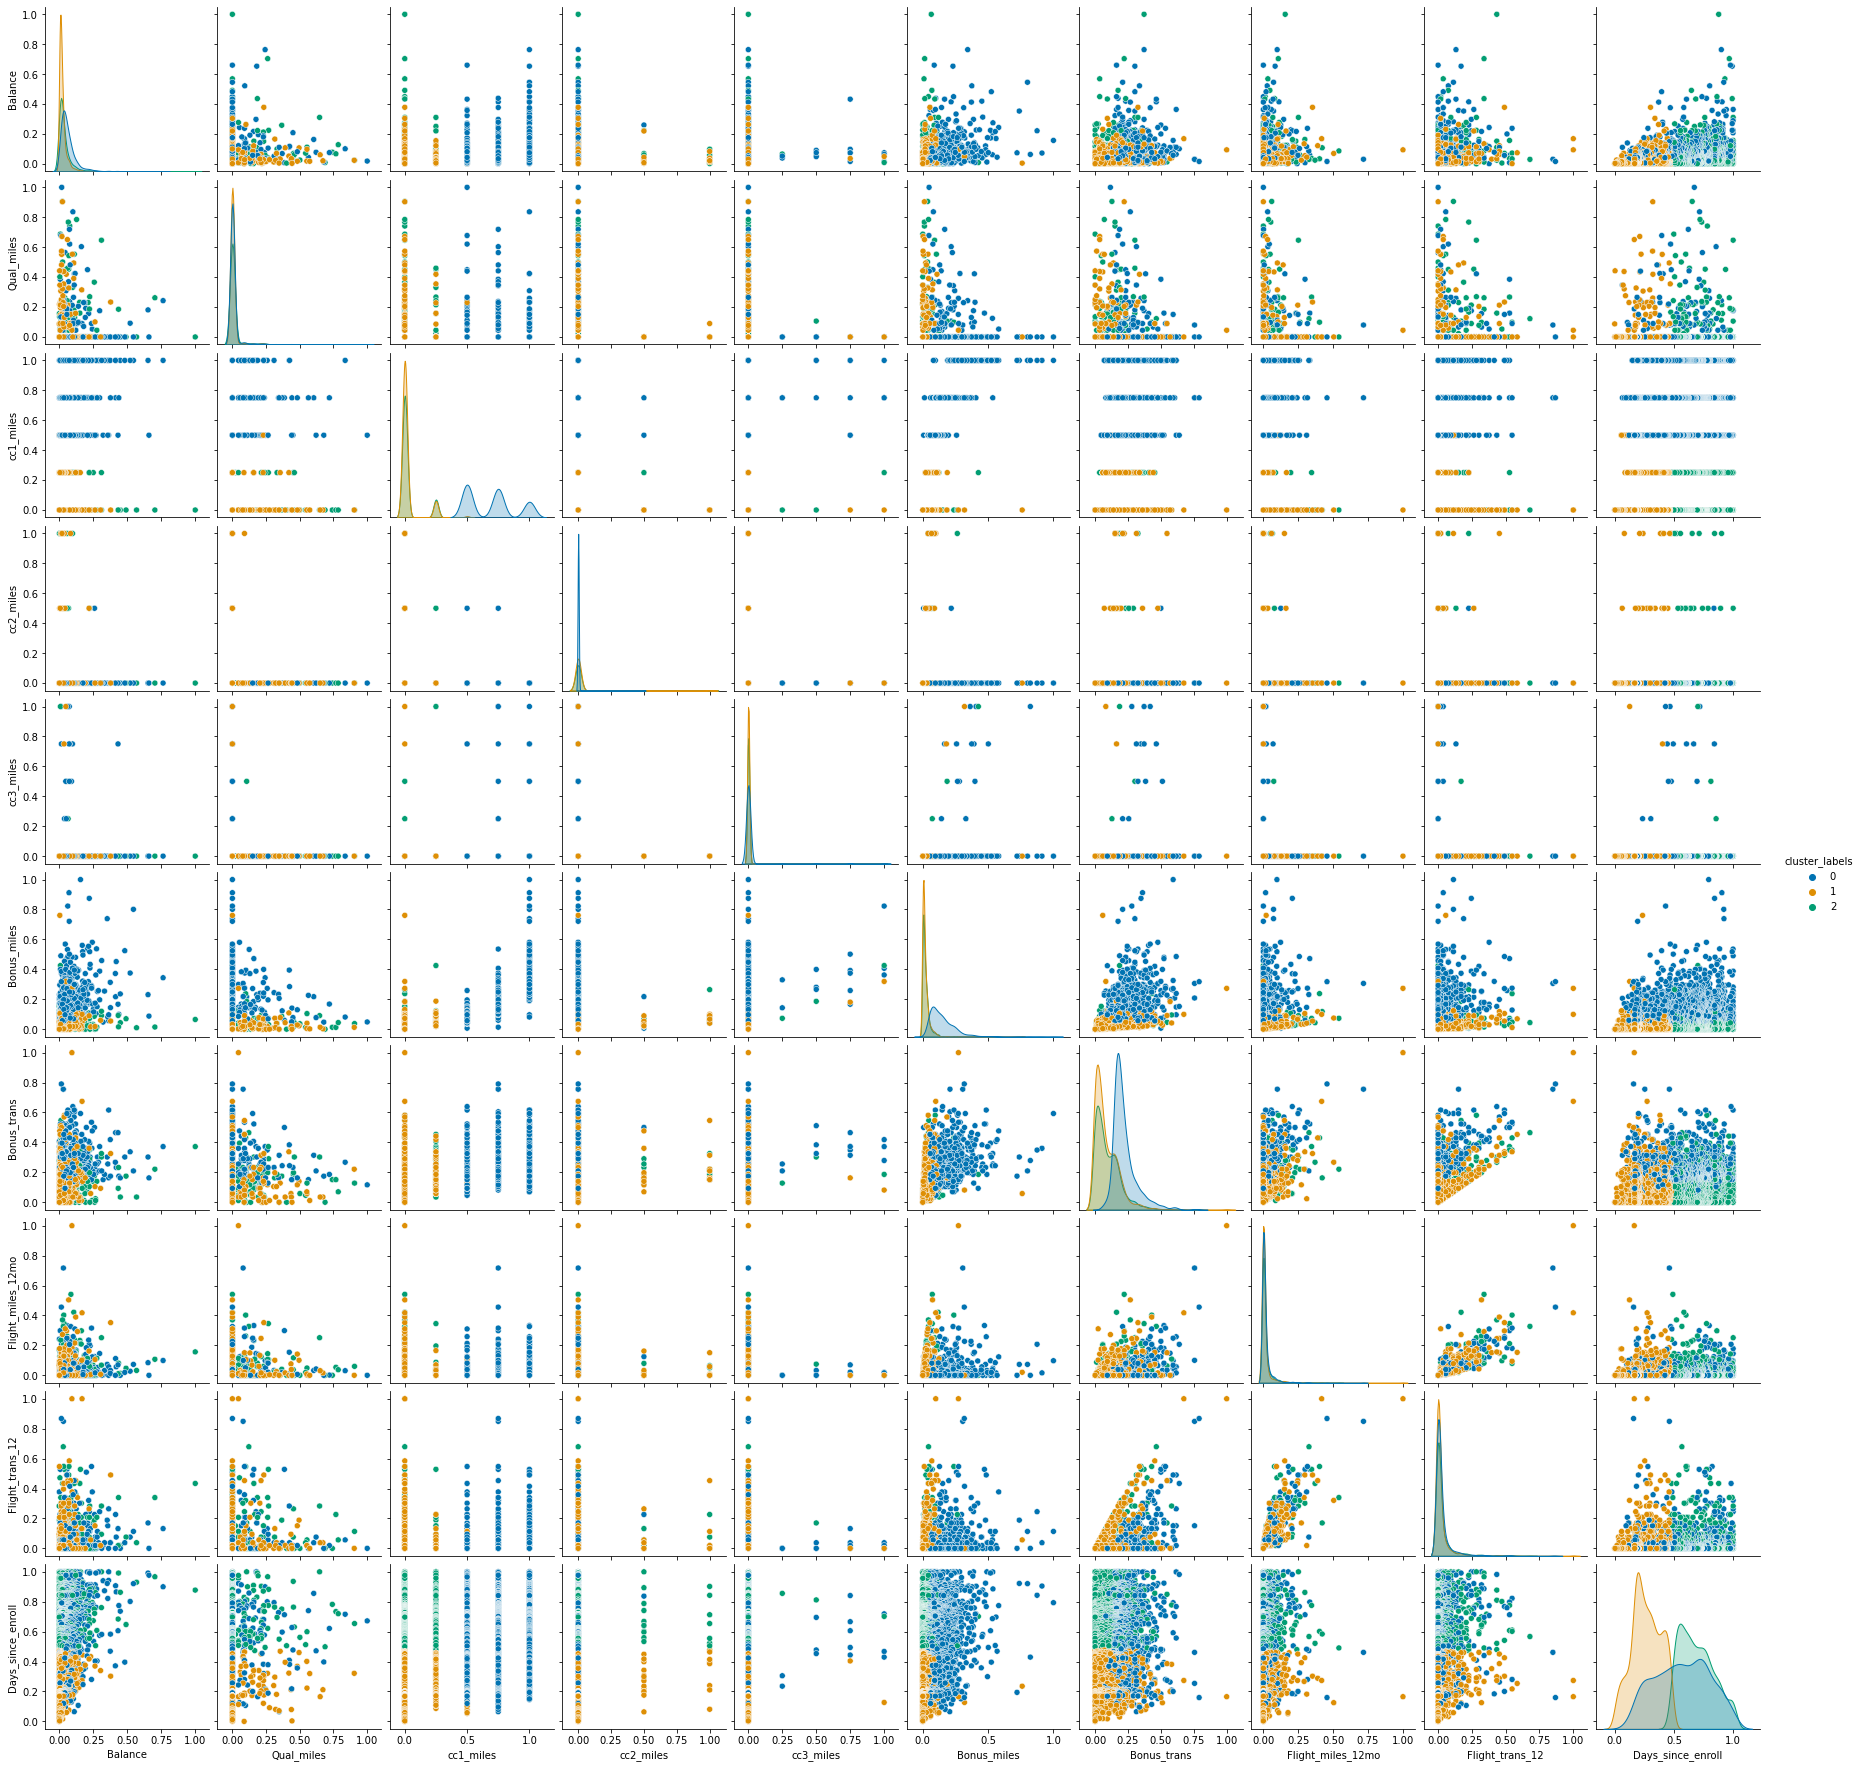

In [68]:
sns.pairplot(df_kmeans_w_clusters,hue='cluster_labels',palette='colorblind')

## Pairplot DBSCAN Clusters

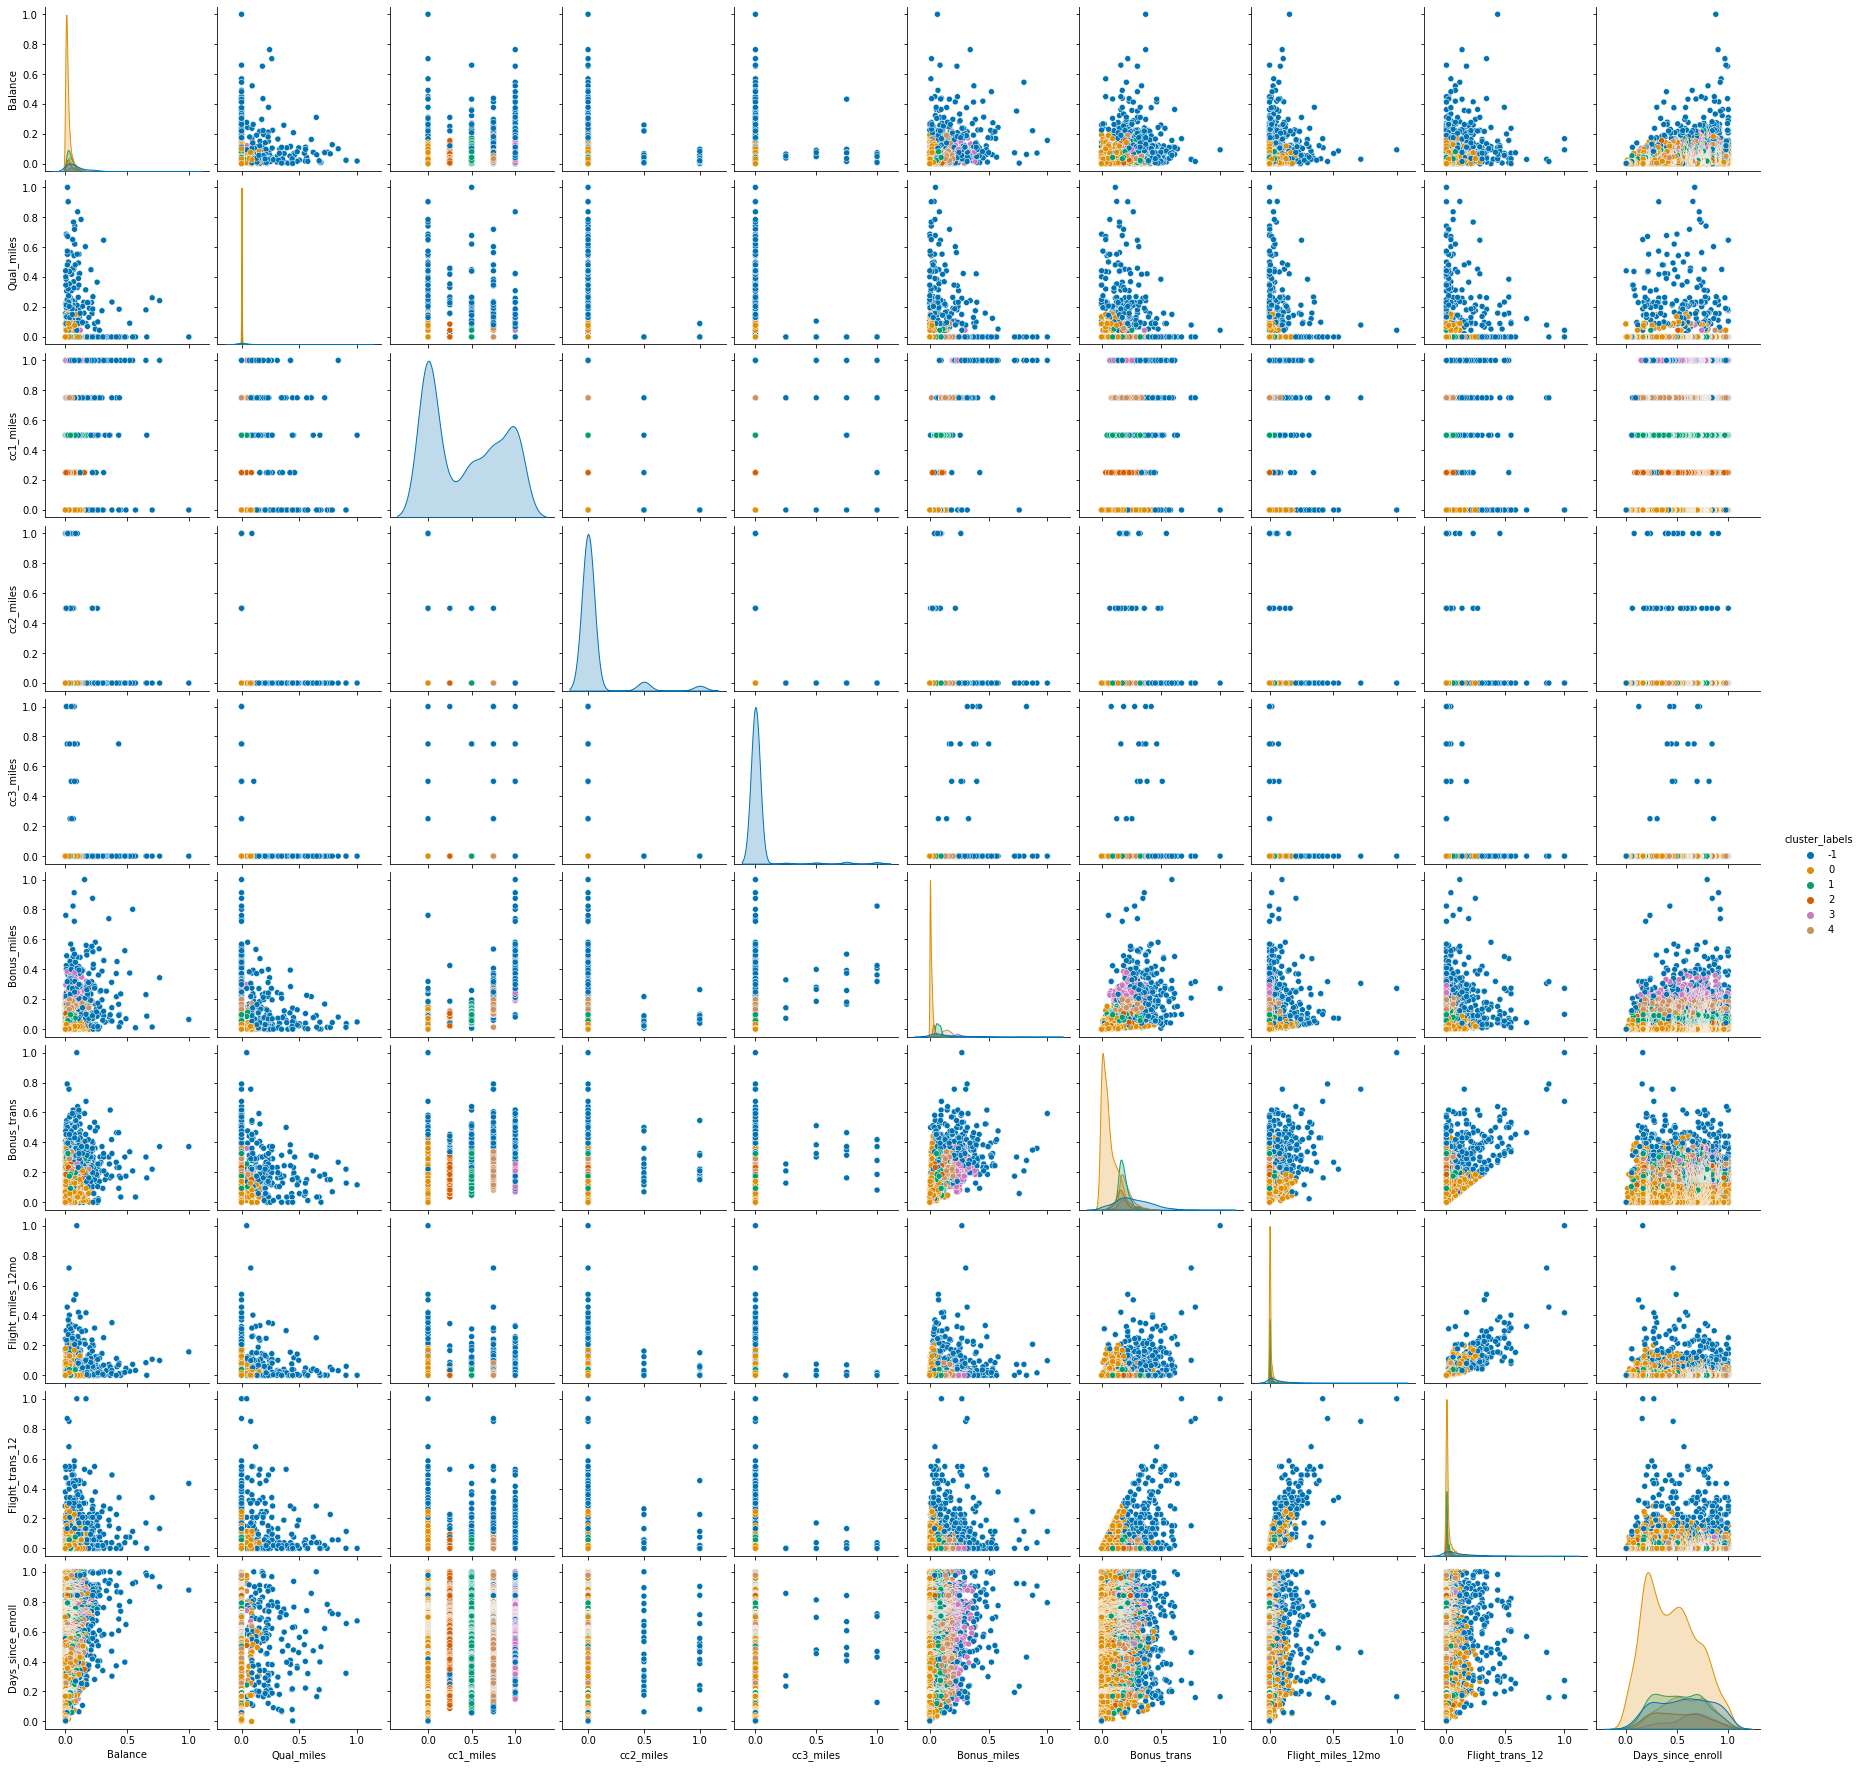

In [69]:
sns.pairplot(df_df_w_clstr_lbl,hue='cluster_labels',palette='colorblind')

In [70]:
#Sr.No.: Clustering Method     No. Of Clusters  Silhouette Score     Parameters
#01     Hierarchical Clustering     5              0.384              n_clusters=5,metric='euclidean',linkage='complete'
#02     KMeans Clustering           3              0.403              n_clusters=3
#03     DBSCAN Clustering           6              0.176              epsilon=0.1,min_samples=10

#### KMeans performed the best among the three methods, indicating well-defined clusters